In [110]:
import pandas
import numpy as np
import matplotlib.pyplot as Mp
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

In [111]:
data = pandas.read_csv("SVMdataset.csv")

In [112]:
data.head()

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [113]:
x=data.iloc[:,:-1].values
y=data.iloc[:,2].values

In [114]:
X_train, X_1, y_train, y_1 = train_test_split(x, y, train_size=0.6,random_state=42)
X_test, X_v, y_test, y_v = train_test_split(X_1, y_1, train_size=0.5,random_state=42)

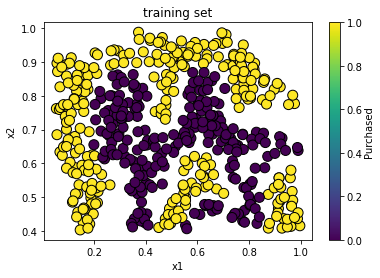

In [115]:
Mp.figure()
Mp.scatter(X_train[:,0],X_train[:,1],
           edgecolor='k',
           s = 100,
           c=y_train)
Mp.ylabel('x2')
Mp.xlabel('x1')
Mp.title('training set')
cbar= Mp.colorbar()
cbar.set_label("Purchased", labelpad=+1)

Mp.show()

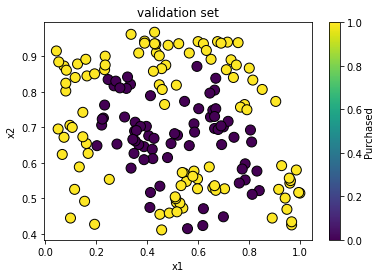

In [116]:
Mp.figure()
Mp.scatter(X_v[:,0],X_v[:,1],
           edgecolor='k',
           s = 100,
           c=y_v)
Mp.ylabel('x2')
Mp.xlabel('x1')
Mp.title('validation set')
cbar= Mp.colorbar()
cbar.set_label("Purchased", labelpad=+1)

Mp.show()

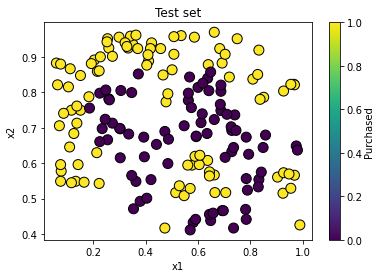

In [117]:
Mp.figure()
Mp.scatter(X_test[:,0],X_test[:,1],
           edgecolor='k',
           s = 100,
           c=y_test)
Mp.ylabel('x2')
Mp.xlabel('x1')
Mp.title('Test set')
cbar= Mp.colorbar()
cbar.set_label("Purchased", labelpad=+1)

Mp.show()

In [118]:
c=np.zeros(20)
l=0
i=1000
while l<20:
    c[l]=i
    i=i/2
    l=l+1

g=np.zeros(20)
l=0
i=1000
while l<20:
    g[l]=i
    i=i/2
    l=l+1

In [119]:
cbest=1000
gbest=1000
clf = SVC(kernel='rbf',C =cbest,gamma=gbest)
clf.fit(X_train, y_train)
y_vp=clf.predict(X_v)
f1best =metrics.f1_score(y_v,y_vp)
for i1 in c:
    for i2 in g:
        clf = SVC(kernel='rbf',C =i1,gamma=i2)
        clf.fit(X_train, y_train)
        y_vp=clf.predict(X_v)
        f1 =metrics.f1_score(y_v,y_vp)
        if f1best<f1:
            f1best=f1
            cbest=i1
            gbest=i2
            

clf = SVC(kernel='rbf',C =cbest,gamma=gbest)
clf.fit(X_train, y_train)

SVC(C=1000, gamma=1000)

confusion_matrix for training set


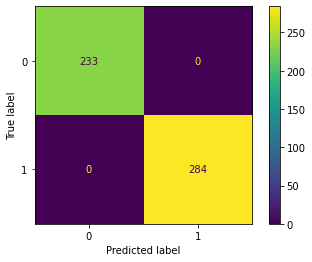

In [120]:
print('confusion_matrix for training set')
metrics.plot_confusion_matrix(clf, X_train, y_train)

confusion_matrix for validation set


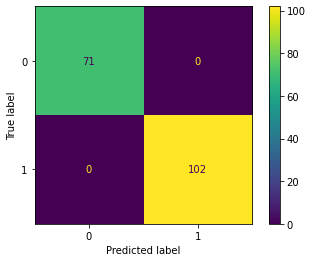

In [121]:
print('confusion_matrix for validation set')
metrics.plot_confusion_matrix(clf, X_v, y_v)

confusion_matrix for test set


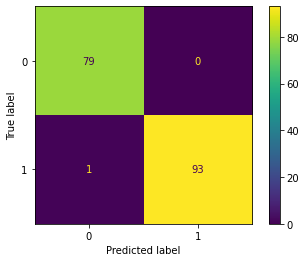

In [122]:
print('confusion_matrix for test set')
metrics.plot_confusion_matrix(clf, X_test, y_test)

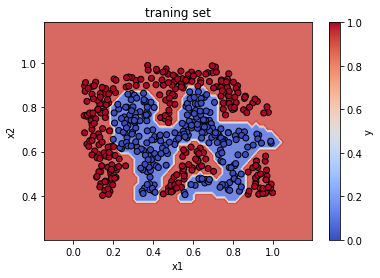

In [123]:
import matplotlib.pyplot as plt
h = .02
x_min_t, x_max_t = X_train[:, 0].min() - 0.2, X_train[:, 0].max() + 0.2
y_min_t, y_max_t = X_train[:, 1].min() - 0.2, X_train[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min_t, x_max_t, h),
                     np.arange(y_min_t, y_max_t, h))


plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel('x1')
plt.ylabel('x2')
cbar= Mp.colorbar()
cbar.set_label("y", labelpad=+1)
plt.title('traning set')

plt.show()

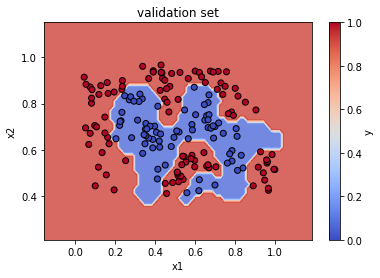

In [124]:
h = .02
x_min_t, x_max_t = X_v[:, 0].min() - 0.2, X_v[:, 0].max() + 0.2
y_min_t, y_max_t = X_v[:, 1].min() - 0.2, X_v[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min_t, x_max_t, h),
                     np.arange(y_min_t, y_max_t, h))


plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
plt.scatter(X_v[:, 0], X_v[:, 1], c=y_v,edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel('x1')
plt.ylabel('x2')
cbar= Mp.colorbar()
cbar.set_label("y", labelpad=+1)
plt.title('validation set')

plt.show()

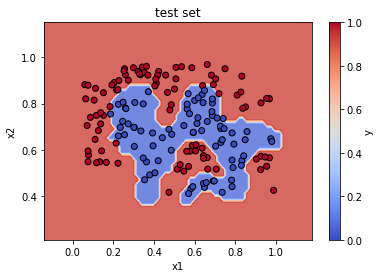

In [125]:
h = .02
x_min_t, x_max_t = X_test[:, 0].min() - 0.2, X_test[:, 0].max() + 0.2
y_min_t, y_max_t = X_test[:, 1].min() - 0.2, X_test[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min_t, x_max_t, h),
                     np.arange(y_min_t, y_max_t, h))


plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test,edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel('x1')
plt.ylabel('x2')
cbar= Mp.colorbar()
cbar.set_label("y", labelpad=+1)
plt.title('test set')

plt.show()

In [126]:
print('trainig set')
y_p=clf.predict(X_train)
acc =metrics.accuracy_score(y_train,y_p)
print("Accuracy = ",acc)
f1 =metrics.f1_score(y_train,y_p)
print("F1 score = ",f1)
precision =metrics.precision_score(y_train,y_p)
print("Precision = ",precision)
recall=metrics.recall_score(y_train,y_p)
print("recall = " , recall)

trainig set
Accuracy =  1.0
F1 score =  1.0
Precision =  1.0
recall =  1.0


In [127]:
print('test set')
Y_predicit_test=clf.predict(X_test)
acc =metrics.accuracy_score(y_test,Y_predicit_test)
print("Accuracy = ",acc)
f1 =metrics.f1_score(y_test,Y_predicit_test)
print("F1 score = ",f1)
precision =metrics.precision_score(y_test,Y_predicit_test)
print("Precision = ",precision)
recall=metrics.recall_score(y_test,Y_predicit_test)
print("recall = " , recall)

test set
Accuracy =  0.9942196531791907
F1 score =  0.9946524064171123
Precision =  1.0
recall =  0.9893617021276596


In [128]:
print('validation set')
Y_v=clf.predict(X_v)
acc =metrics.accuracy_score(y_v,Y_v)
print("Accuracy = ",acc)
f1 =metrics.f1_score(y_v,Y_v)
print("F1 score = ",f1)
precision =metrics.precision_score(y_v,Y_v)
print("Precision = ",precision)
recall=metrics.recall_score(y_v,Y_v)
print("recall = " , recall)

validation set
Accuracy =  1.0
F1 score =  1.0
Precision =  1.0
recall =  1.0
